<a href="https://colab.research.google.com/github/Martishamao/sales_predictions/blob/main/Sales_Prediction_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 3 (Core)
- Martisha Owens
- Part 3 was added on to Part 2




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/drive/MyDrive/Coding Dojo/01 Python/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Part 2 Core**

In [ ]:
# 1) How many rows and columns?
df.shape

(8523, 12)

> The Data has 8523 rows and 12 columns.

In [63]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# 2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# 3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

> This shows that there are no duplicated data.


In [ ]:
# 4) Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> Item_Weight has 1463 missing data while Outlet_Size has 2410 missing data.

In [ ]:
#Seeing if any grouping assumptions could be made for the missing Outlet_Size data.
df[df['Outlet_Size'].isna()].groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   555
Supermarket Type1  Tier 2                  1855
Name: Outlet_Location_Type, dtype: int64

> Of the 2410 missing data for Outlet_Size, 555 are Grocery Store, Tier 3 and 1855 are Supermarket Type 1, Tier 2.

In [ ]:
#Observing the groupings for the Outlet_Size data.
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].unique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                          [Small]
                   Tier 3                            [nan]
Supermarket Type1  Tier 1                  [Medium, Small]
                   Tier 2                     [nan, Small]
                   Tier 3                           [High]
Supermarket Type2  Tier 3                         [Medium]
Supermarket Type3  Tier 3                         [Medium]
Name: Outlet_Size, dtype: object

> Grocery Store only has Outlet_Size data for Tier 1 which is small. Using assumption, Grocery Store, Tier 3 would be Medium or Large.
>For Supermarket Type1, Tier 2, the Outlet_Size is Small. The missing data can be replaced with Small.

In [3]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

> Item_Weight is numerical, thus the mean will be used to replace the missing data.


In [4]:
# Using the assumptions from #4, Setting the Grocery Store, Tier 3 and Supermarket Type1, Tier 2 null items
df['Outlet_Size'].loc[(df['Outlet_Size'].isna())& (df['Outlet_Type'] =='Grocery Store') &(df['Outlet_Location_Type']=='Tier 3')] = 'Large'
df['Outlet_Size'].loc[(df['Outlet_Size'].isna())& (df['Outlet_Type'] =='Supermarket Type1') &(df['Outlet_Location_Type']=='Tier 2')] = 'Small'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
# 6) Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Listed are the category and items that needs to be fixed.
- Item_Fat_Content = ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
- Outlet_Size = ['Medium' 'Large' 'High' 'Small']

In [6]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat','Regular'], inplace = True)
df['Outlet_Size'].replace('High', 'Large', inplace = True)
print(df['Item_Fat_Content'].unique())
print(df['Outlet_Size'].unique())

['Low Fat' 'Regular']
['Medium' 'Large' 'Small']


In [ ]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe(include=[np.number])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Part 3 Core**

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


#Histogram


---

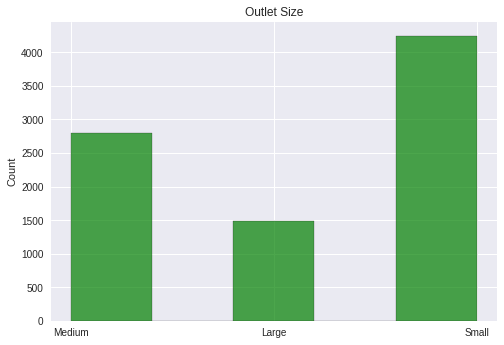

In [119]:
df['Outlet_Size'].hist(edgecolor = 'black', bins = 5, color = 'green', alpha = 0.7);
plt.ylabel('Count')
plt.title('Outlet Size')
plt.style.use('seaborn');

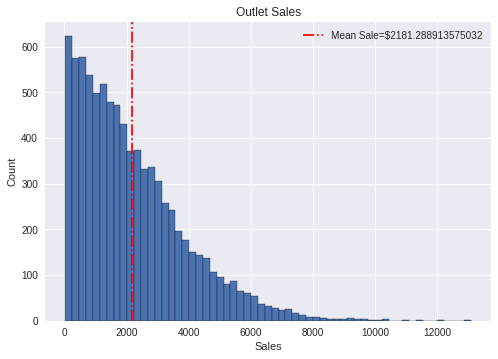

In [116]:
from tables.node import MetaNode
ax = df['Item_Outlet_Sales'].hist(edgecolor = 'black', bins = 'auto')
plt.ylabel('Count')
plt.xlabel('Sales')
plt.title('Outlet Sales')

mean = df['Item_Outlet_Sales'].mean()
ax.axvline(mean, color = 'red', linestyle = '-.', label=f"Mean Sale=${mean}")
ax.legend()

plt.style.use('seaborn');

#Boxplot


---

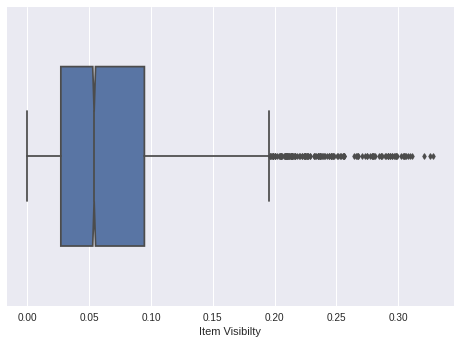

In [107]:
sns.boxplot(data=df, x = 'Item_Visibility', notch = True, fliersize = 4, width = .6)
plt.xlabel('Item Visibilty');

#Heatmap
---

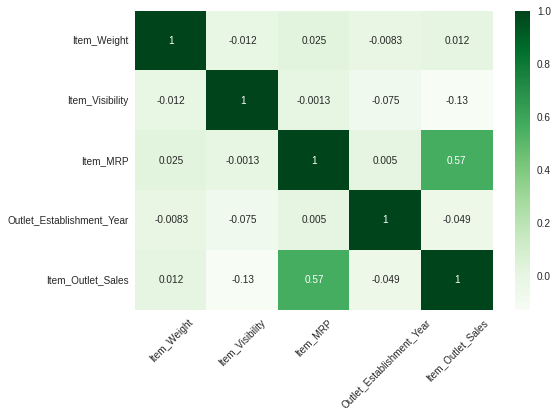

In [71]:
sns.heatmap(df.corr(), cmap = 'Greens',annot=True)
plt.xticks(rotation =45);